In [13]:
# make sure packages are installed
import subprocess
def install_package(package_name):
    subprocess.check_call(["pip", "install", package_name])

install_package("numpy")
install_package("pandas")
install_package("matplotlib")
install_package("ipympl")
install_package("ipywidgets")
install_package("mplcursors")

In [14]:
%matplotlib widget

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import ipywidgets as widgets
import mplcursors as mplc

filename_snapshot = "Dataset/snapshots_arabia_t_5040.csv"
filename_overview = "Dataset/aoe_data.csv"
filepath_inputs = "Dataset/inputs/"

In [15]:
data        = pd.read_csv(filename_snapshot)
print("Loaded data")

overview    = pd.read_csv(filename_overview)
print("Loaded overview", )

Loaded data
Loaded overview


(60.0, 100.0)


FloatSlider(value=0.0, description='Angle', max=6.283185307179586)

FloatSlider(value=10.0, description='Radius', max=40.0)

FloatSlider(value=40.0, description='Distance', max=60.0)

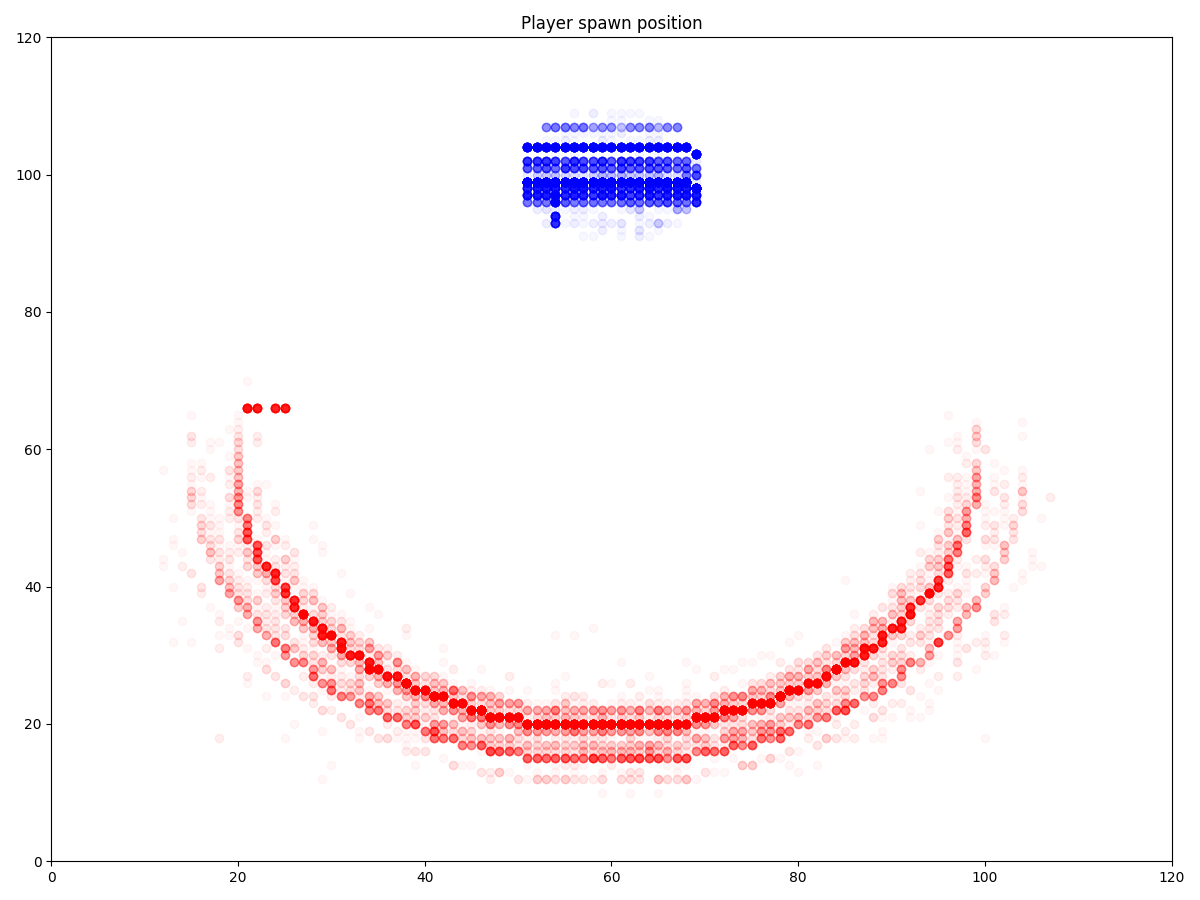

Selected


UnboundLocalError: local variable 'gameSelected' referenced before assignment

Selected


UnboundLocalError: local variable 'gameSelected' referenced before assignment

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

Selected


UnboundLocalError: local variable 'gameSelected' referenced before assignment

Selected


UnboundLocalError: local variable 'gameSelected' referenced before assignment

Selected


UnboundLocalError: local variable 'gameSelected' referenced before assignment

Selected


UnboundLocalError: local variable 'gameSelected' referenced before assignment

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

StopIteration: 

In [16]:
# Player town center spawn correlation

map_width = 120

# Interactive parameters
current_angle = 0
current_radius = 10
current_distance = 40

figure = plt.figure(figsize=(12, 9))
plt.title("Player spawn position")

data_p1_filtered = [[], []]
data_p2_matching = [[], []]

data_filtered = overview.loc[
    (overview["p1_xpos"] < 40) & 
    (overview["p1_ypos"] > 50) &
    (overview["p1_ypos"] < 70)]

# Plots
plot_p1 = plt.plot([], [], "o", alpha=0.03, color="blue")
plot_p2 = plt.plot([], [], "o", alpha=0.03, color="red")

# Widgets
widget_angle = widgets.FloatSlider(description="Angle", value=current_angle, min=0.0, max=math.pi * 2)
widget_radius = widgets.FloatSlider(description="Radius", value=current_radius, min=0.0, max=40)
widget_distance = widgets.FloatSlider(description="Distance", value=current_distance, min=0.0, max=map_width / 2)

global gameSelected
gameSelected = False
global selectedGameID
selectedGameID = -1

def select_game(selectionRef):
    global gameSelected
    print("Selected")
    if (gameSelected): gameSelected = False
    else: gameSelected = True

def v4_draw(angle, radius, distance):
    position = (
        map_width / 2 + distance * math.sin(angle),
        map_width / 2 + distance * math.cos(angle)
    )
    radius_squared = radius * radius
    print(position)
    # data_filtered = overview.loc[
    #     (overview["p1_xpos"] < 40) & 
    #     ((overview["p1_ypos"] - 60).abs() < 10)]
    data_filtered = overview.loc[
        (overview["p1_xpos"] - position[0]) * (overview["p1_xpos"] - position[0]) + 
        (overview["p1_ypos"] - position[1]) * (overview["p1_ypos"] - position[1]) < radius_squared
    ]
    plot_p1[0].set_xdata(data_filtered["p1_xpos"])
    plot_p1[0].set_ydata(data_filtered["p1_ypos"])
    plot_p2[0].set_xdata(data_filtered["p2_xpos"])
    plot_p2[0].set_ydata(data_filtered["p2_ypos"])

    cursors = mplc.cursor(plot_p1)
    cursors.connect("add", lambda sel: select_game(sel))




def v4_draw_with_globals():
    global current_angle
    global current_radius
    global current_distance
    v4_draw(current_angle, current_radius, current_distance)

def v4_listener_angle(change):
    global current_angle
    current_angle = change.new
    v4_draw_with_globals()

def v4_listener_radius(change):
    global current_radius
    current_radius = change.new
    v4_draw_with_globals()

def v4_listener_distance(change):
    global current_distance
    current_distance = change.new
    v4_draw_with_globals()

widget_angle.observe(v4_listener_angle, names='value')
widget_radius.observe(v4_listener_radius, names='value')
widget_distance.observe(v4_listener_distance, names='value')

v4_draw_with_globals()

plt.xlim(0, map_width)
plt.ylim(0, map_width)


display(widget_angle)
display(widget_radius)
display(widget_distance)
plt.tight_layout()
plt.show()

# layout = widgets.AppLayout(
#     left_sidebar = widgets.VBox(children=[widget_angle, widget_distance, widget_radius]),
#     center = figure.canvas
# )